# Computational Drug Discovery Project - Ligand Based Drug Design [Part2] Data Analysis ( drug-like properties )

Perform Descriptor Calculation and Data Analysis.

We used to Lipinski descriptors to discover the overview of drug-like properties of molecules.

-------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
df = pd.read_csv('ppara_bioactivity_data_preprocessed.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,type
0,CHEMBL15594,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,1200.000000,['IC50']
1,CHEMBL167430,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,2399.220000,['pEC50' 'EC50']
2,CHEMBL192518,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,500.396667,['EC50' 'pEC50']
3,CHEMBL1934484,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,6.000000,['EC50']
4,CHEMBL212911,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,4257.000000,['IC50']
...,...,...,...,...
1669,CHEMBL5194126,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,4800.000000,EC50
1670,CHEMBL5194570,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,7200.000000,EC50
1671,CHEMBL5207420,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,9100.000000,EC50
1672,CHEMBL5186824,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,10000.000000,EC50


## Convert values to pChEMBL values

The original values have uneven distribution of the data points, so pChEMBL values allowed us to discover the distribution of the data easily. 
(-log of original values)

This custom function pIC50() will accept a DataFrame as input and will:

1. Take the bioactivity values from the standard_value column and converts it from nM to M by multiplying the value by 10
2. Take the molar value and apply -log10
3. Delete the standard_value column and create a new pIC50 column

In [2]:
import numpy as np

def pChEMBL(input):
    pChEMBL = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pChEMBL.append(-np.log10(molar))

    input['pChEMBL'] = pChEMBL
    x = input.drop('standard_value_norm', 1)
        
    return x

In [3]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [4]:
df_norm = norm_value(df)
df_norm

/var/folders/jv/rf9v6lk51tqg62hxzfwfjg1w0000gn/T/ipykernel_77598/3777778642.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,type,standard_value_norm
0,CHEMBL15594,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,['IC50'],1200.000000
1,CHEMBL167430,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,['pEC50' 'EC50'],2399.220000
2,CHEMBL192518,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,['EC50' 'pEC50'],500.396667
3,CHEMBL1934484,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,['EC50'],6.000000
4,CHEMBL212911,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,['IC50'],4257.000000
...,...,...,...,...
1669,CHEMBL5194126,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,EC50,4800.000000
1670,CHEMBL5194570,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,EC50,7200.000000
1671,CHEMBL5207420,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,EC50,9100.000000
1672,CHEMBL5186824,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,EC50,10000.000000


In [5]:
df_pchem = pChEMBL(df_norm)
df_pchem

/var/folders/jv/rf9v6lk51tqg62hxzfwfjg1w0000gn/T/ipykernel_77598/1719146487.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,type,pChEMBL
0,CHEMBL15594,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,['IC50'],5.920819
1,CHEMBL167430,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,['pEC50' 'EC50'],5.619930
2,CHEMBL192518,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,['EC50' 'pEC50'],6.300686
3,CHEMBL1934484,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,['EC50'],8.221849
4,CHEMBL212911,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,['IC50'],5.370896
...,...,...,...,...
1669,CHEMBL5194126,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,EC50,5.318759
1670,CHEMBL5194570,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,EC50,5.142668
1671,CHEMBL5207420,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,EC50,5.040959
1672,CHEMBL5186824,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,EC50,5.000000


In [6]:
df_pchem.to_csv('ppara_bioactivity_data_pchembl.csv')

## Calculate Lipinski descriptors

To discover the general chemical space of compounds, Lipinski's rule-of-five (Ro5) descriptors were used. The Ro5 criteria does not discriminate drugs from non-drugs, however, it is useful for therapeutically relevant pharmacokinetic space. 

The Lipinski's Rule stated the following:

Molecular weight < 500 
Dalton Octanol-water partition coefficient (LogP) < 5 
Hydrogen bond donors < 5 
Hydrogen bond acceptors < 10

In [7]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [8]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        # Check if Ro5 conditions fulfilled
        conditions = [desc_MolWt > 500, desc_NumHAcceptors > 10, desc_NumHDonors > 5, desc_MolLogP > 5]
        RO5_Violations = sum(conditions)   
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors,
                        RO5_Violations])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors","#RO5 Violations"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [10]:
df_lipinski = lipinski(df_pchem.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors,#RO5 Violations
0,304.474,6.21670,1.0,1.0,1.0
1,482.374,5.66820,1.0,4.0,1.0
2,310.271,3.78010,1.0,2.0,0.0
3,435.549,4.52394,2.0,5.0,0.0
4,460.570,6.04202,1.0,4.0,1.0
...,...,...,...,...,...
1669,460.508,4.03690,2.0,7.0,0.0
1670,371.433,3.84810,2.0,4.0,0.0
1671,329.421,3.19150,2.0,3.0,0.0
1672,385.460,3.77190,2.0,4.0,0.0


Combine two DataFrame

In [11]:
df_combined = pd.concat([df_pchem,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,type,pChEMBL,MW,LogP,NumHDonors,NumHAcceptors,#RO5 Violations
0,CHEMBL15594,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,['IC50'],5.920819,304.474,6.21670,1.0,1.0,1.0
1,CHEMBL167430,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,['pEC50' 'EC50'],5.619930,482.374,5.66820,1.0,4.0,1.0
2,CHEMBL192518,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,['EC50' 'pEC50'],6.300686,310.271,3.78010,1.0,2.0,0.0
3,CHEMBL1934484,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,['EC50'],8.221849,435.549,4.52394,2.0,5.0,0.0
4,CHEMBL212911,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,['IC50'],5.370896,460.570,6.04202,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...
1669,CHEMBL5194126,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,EC50,5.318759,460.508,4.03690,2.0,7.0,0.0
1670,CHEMBL5194570,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,EC50,5.142668,371.433,3.84810,2.0,4.0,0.0
1671,CHEMBL5207420,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,EC50,5.040959,329.421,3.19150,2.0,3.0,0.0
1672,CHEMBL5186824,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,EC50,5.000000,385.460,3.77190,2.0,4.0,0.0


In [12]:
df_combined.to_csv('ppara_bioactivity_data_ro5.csv')

## Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

### pChEMBL values distribution

<Figure size 396x396 with 0 Axes>

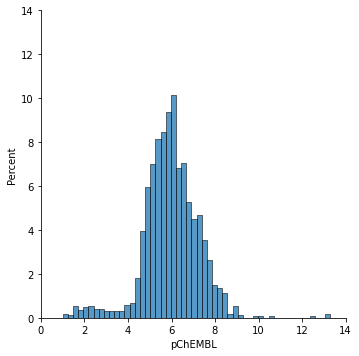

In [14]:
# the pChEMBL values distribution of compounds
plt.figure(figsize=(5.5, 5.5))
sns.displot(data=df_combined, x="pChEMBL", stat="percent")
plt.xlim(0, 14)
plt.ylim(0, 14)
plt.savefig('plot_distribution_pChEMBL_A.pdf')

### Violations of the Ro5 criteria

<Figure size 396x396 with 0 Axes>

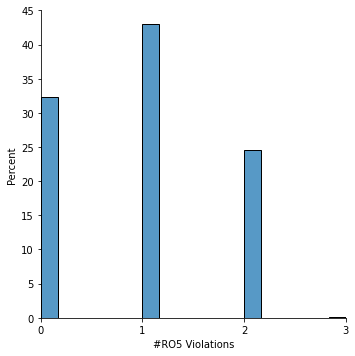

In [15]:
# the percentage of compounds with violations of the Ro5 criteria 
plt.figure(figsize=(5.5, 5.5))
a=sns.displot(data=df_combined, x="#RO5 Violations", stat="percent")
a.set(xlim=(0,3),xticks=[0,1,2,3])
plt.ylim(0, 45)
plt.savefig('plot_ro5violation_A.pdf')

### Bioactivity with Ro5 violation

<Figure size 1584x396 with 0 Axes>

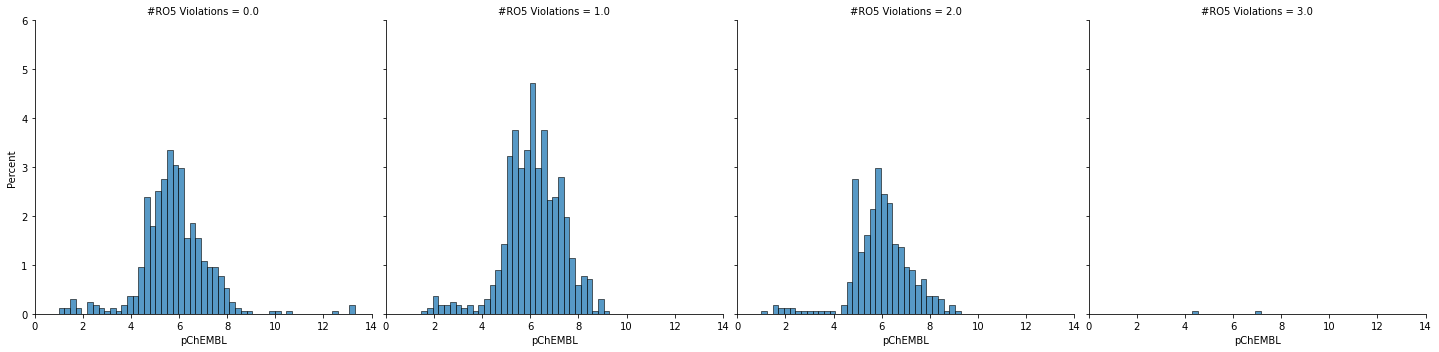

In [16]:
# the distribution of pChEMBL values for compounds targeting PPAR alpha in violation of Ro5
plt.figure(figsize=(22, 5.5))
a=sns.displot(data=df_combined, x="pChEMBL", col="#RO5 Violations", stat="percent")
plt.xlim(0, 14)
plt.ylim(0, 6)
plt.savefig('plot_pchembl&ro5_A.pdf')